In [4]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv("https://cdncontribute.geeksforgeeks.org/wp-content/uploads/nba.csv")  
data_top = data.head() # head of data frame
data_columns = list(data.columns) # columns name in data frame

In [6]:
# Summary
data.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [7]:
data.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [8]:
# Drop NA rows from dataset
data.dropna(subset = ['Height'], axis = 0, inplace = True) 

# Replace missing value
Weight_mean = data["Weight"].mean()
Salary_mean = data["Salary"].mean()
College_freq = np.argmax(data["College"].value_counts())
                         

data["Weight"] = data["Weight"].fillna(Weight_mean)
data["Salary"] = data["Salary"].fillna(Salary_mean)
data["College"] = data["College"].fillna(College_freq)                         

C:\Users\ppatrzalek\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


In [9]:
# Data formatting
data.rename(columns = {"Team":"NBA Team", "Salary":"Salary [mln]"}, inplace = True)

In [10]:
data["Number"] = data["Number"].astype("int")
data["Age"] = data["Age"].astype("int")
data["Weight"] = data["Weight"].astype("int")
data["Salary [mln]"] = data['Salary [mln]'].astype("float64")

In [11]:
# Data normalization
# Simple feature scaling
data["Weight_scaling"] = data["Weight"]/data["Weight"].max()
# Min - Max
data["Weight_minmax"] = (data["Weight"] - data["Weight"].min())/(data["Weight"].max() - data["Weight"].min())
# Z - score
data["Weight_zscore"] = (data["Weight"] - data["Weight"].mean())/data["Weight"].std()

In [12]:
# Binning
bins = np.linspace(data["Salary [mln]"].min(), data["Salary [mln]"].max(), 4)
group_names = ["Low", "Medium", "High"]
data["Salary Binned"] = pd.cut(data["Salary [mln]"], bins, labels = group_names, include_lowest = True)

In [13]:
data.head()

,Name,NBA Team,Number,Position,Age,Height,Weight,College,Salary [mln],Weight_scaling,Weight_minmax,Weight_zscore,Salary Binned
0,Avery Bradley,Boston Celtics,0,PG,25,6-2,180,Texas,7.730337e+06,0.586319,0.130137,-1.574728,Low
1,Jae Crowder,Boston Celtics,99,SF,25,6-6,235,Marquette,6.796117e+06,0.765472,0.506849,0.511106,Low
2,John Holland,Boston Celtics,30,SG,27,6-5,205,Boston University,4.842684e+06,0.667752,0.301370,-0.626622,Low
3,R.J. Hunter,Boston Celtics,28,SG,22,6-5,185,Georgia State,1.148640e+06,0.602606,0.164384,-1.385107,Low
4,Jonas Jerebko,Boston Celtics,8,PF,29,6-10,231,Kentucky,5.000000e+06,0.752443,0.479452,0.359409,Low


In [14]:
# One - hot encoding [dummy variable]
dummies = pd.get_dummies(data["Salary Binned"])


In [15]:
# Exploratory Data Analysis
import seaborn as sns

sns.boxplot(x = "Position", y = "Salary [mln]", data = data)

Text(0.5, 1.0, 'Scatterplot of Height vs Salary')

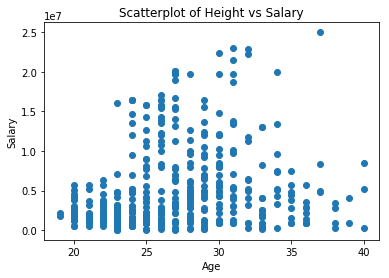

In [16]:
from matplotlib import pyplot as plt

plt.scatter(x = "Age", y = "Salary [mln]", data = data)
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Scatterplot of Height vs Salary")


In [17]:
# Groupby

data_test = data[["NBA Team", "College", "Salary [mln]"]]
data_grb = data_test.groupby(["NBA Team", "College"], as_index = False).mean()

In [18]:
# Pivot
data_pivot = data_grb.pivot(index = "College", columns = "NBA Team")
data_pivot.fillna(0, inplace = True)
data_pivot.head()

Salary [mln]                                                 \
NBA Team      Atlanta Hawks Boston Celtics Brooklyn Nets Charlotte Hornets   
College                                                                      
Alabama                 0.0            0.0           0.0               0.0   
Arizona                 0.0            0.0     1335480.0               0.0   
Arizona State           0.0            0.0           0.0               0.0   
Arkansas                0.0            0.0           0.0               0.0   
Baylor                  0.0            0.0           0.0               0.0   

                                                                  \
NBA Team      Chicago Bulls Cleveland Cavaliers Dallas Mavericks   
College                                                            
Alabama                 0.0           2100000.0              0.0   
Arizona                 0.0           4570152.5              0.0   
Arizona State           0.0                 0.0              0.0   
Arkansas          1391160.0                 0.0              0.0   
Baylor                  0.0                 0.0              0.0   

                                                                    ...  \
NBA Team      Denver Nuggets Detroit Pistons Golden State Warriors  ...   
College                                                             ...   
Alabama                  0.0             0.0                   0.0  ...   
Arizona                  0.0       2841960.0            11710456.0  ...   
Arizona State            0.0             0.0                   0.0  ...   
Arkansas                 0.0             0.0                   0.0  ...   
Baylor                   0.0             0.0                   0.0  ...   

                                                                      \
NBA Team      Oklahoma City Thunder Orlando Magic Philadelphia 76ers   
College                                                                
Alabama                         0.0           0.0                0.0   
Arizona                         0.0     4171680.0           525093.0   
Arizona State                   0.0           0.0                0.0   
Arkansas                        0.0           0.0                0.0   
Baylor                          0.0           0.0                0.0   

                                                                    \
NBA Team      Phoenix Suns Portland Trail Blazers Sacramento Kings   
College                                                              
Alabama                0.0                    0.0              0.0   
Arizona           206192.0                    0.0              0.0   
Arizona State          0.0                    0.0              0.0   
Arkansas               0.0                    0.0              0.0   
Baylor                 0.0                    0.0         981348.0   

                                                                              
NBA Team      San Antonio Spurs Toronto Raptors Utah Jazz Washington Wizards  
College                                                                       
Alabama                     0.0             0.0       0.0                0.0  
Arizona                     0.0             0.0       0.0                0.0  
Arizona State               0.0             0.0       0.0                0.0  
Arkansas                    0.0             0.0       0.0                0.0  
Baylor                      0.0             0.0       0.0                0.0  

[5 rows x 30 columns]

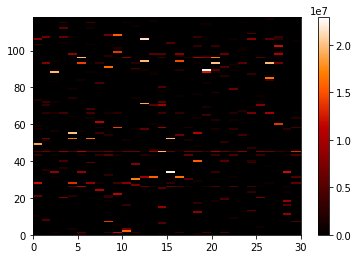

In [19]:
# Heat map
plt.pcolor(data_pivot, cmap = "gist_heat")
plt.colorbar()
plt.show()

C:\Users\ppatrzalek\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


P-value is between  (0.2106266085708384, 5.588285308929614e-06)


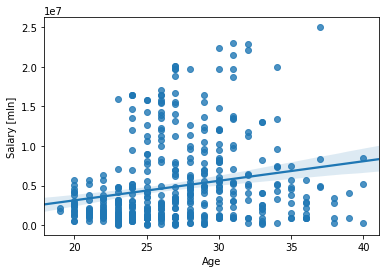

In [20]:
# Correlation
from scipy import stats 
sns.regplot(x = "Age", y = "Salary [mln]", data = data)

p_value = stats.pearsonr(data["Age"], data["Salary [mln]"])
print("P-value is between ", p_value)

In [21]:
# ANOVA
from scipy import stats

df_anova = data[["NBA Team", "Salary [mln]"]]
grouped_anova = df_anova.groupby(["NBA Team"])
anova_results_l = stats.f_oneway(grouped_anova.get_group("Boston Celtics")["Salary [mln]"], grouped_anova.get_group("Chicago Bulls")["Salary [mln]"])

In [22]:
print(anova_results_l)

F_onewayResult(statistic=0.7558179669477507, pvalue=0.3920321775119202)


In [23]:
# Fitting simple linear model
from sklearn.linear_model import LinearRegression

lm1 = LinearRegression()

X = data[["Weight"]]
Y = data[["Salary [mln]"]]

lm1.fit(X, Y)
Yhat1 = lm1.predict(X)

In [24]:
print(lm1.coef_, lm1.intercept_)

[[26555.8041935]] [-1040036.66777566]


In [25]:
lm2 = LinearRegression()

Y = data[["Salary [mln]"]]
Z = data[["Age", "Weight"]]

lm2.fit(Z, Y)
Yhat2 = lm2.predict(Z)

In [26]:
print(lm2.coef_, lm2.intercept_)

[[234982.91250976  23134.18166841]] [-6612210.09875654]


C:\Users\ppatrzalek\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 26256540.102990497)

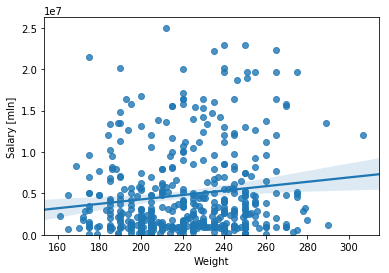

In [27]:
# Model Evaluation using Visualization
import seaborn as sns

sns.regplot(x = "Weight", y = "Salary [mln]", data = data)
plt.ylim(0, )

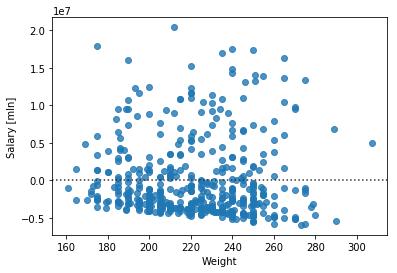

In [28]:
sns.residplot(x = "Weight", y = "Salary [mln]", data = data)

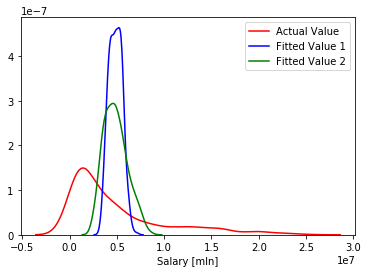

In [29]:
ax1 = sns.distplot(data["Salary [mln]"], hist = False, color = "red", label = "Actual Value")

sns.distplot(Yhat1, hist = False, color = "blue", label = "Fitted Value 1", ax = ax1)
sns.distplot(Yhat2, hist = False, color = "green", label = "Fitted Value 2", ax = ax1)


In [30]:
# Polynomial regression
import numpy as np

f = np.polyfit(data["Weight"], data["Salary [mln]"], 3)
p = np.poly1d(f)
print(p)

         3       2
-0.5417 x + 689 x - 1.99e+05 x + 2.078e+07


In [31]:
from sklearn.preprocessing import PolynomialFeatures

pr = PolynomialFeatures(degree = 2)

x_polly = pr.fit_transform(data[["Weight", "Salary [mln]"]])
print(x_polly)

[[1.00000000e+00 1.80000000e+02 7.73033700e+06 3.24000000e+04
  1.39146066e+09 5.97581101e+13]
 [1.00000000e+00 2.35000000e+02 6.79611700e+06 5.52250000e+04
  1.59708750e+09 4.61872063e+13]
 [1.00000000e+00 2.05000000e+02 4.84268411e+06 4.20250000e+04
  9.92750242e+08 2.34515893e+13]
 ...
 [1.00000000e+00 1.79000000e+02 9.00000000e+05 3.20410000e+04
  1.61100000e+08 8.10000000e+11]
 [1.00000000e+00 2.56000000e+02 2.90000000e+06 6.55360000e+04
  7.42400000e+08 8.41000000e+12]
 [1.00000000e+00 2.31000000e+02 9.47276000e+05 5.33610000e+04
  2.18820756e+08 8.97331820e+11]]


In [32]:
from sklearn.preprocessing import StandardScaler

Scale = StandardScaler()

Scale.fit(data[["Weight", "Salary [mln]"]])
x_scale = Scale.transform(data[["Weight", "Salary [mln]"]])

C:\Users\ppatrzalek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ppatrzalek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  


C:\Users\ppatrzalek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ppatrzalek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\ppatrzalek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\ppatrzalek\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, 

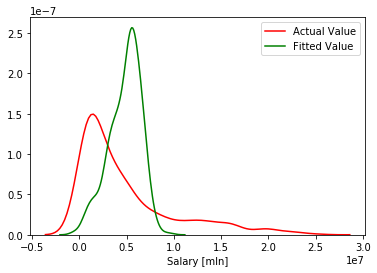

In [33]:
# Pipelines
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

Input = [("scale", StandardScaler()), ("poly", PolynomialFeatures()), ("lm", LinearRegression())]
pipe = Pipeline(Input)

pipe.fit(data[["Weight", "Age"]], data["Salary [mln]"])
yhat = pipe.predict(data[["Weight", "Age"]])

ax1 = sns.distplot(data["Salary [mln]"], hist = False, color = "red", label = "Actual Value")

sns.distplot(yhat, hist = False, color = "green", label = "Fitted Value", ax = ax1)

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

X = data[["Weight_scaling"]] 
Y = data[["Salary [mln]"]]

lm.fit(X, Y)
Yhat = lm.predict(X)
mse = mean_squared_error(Y, Yhat)
r2 = lm.score(X, Y)

print("MSE = ", mse, " \n R2 = ", r2)

MSE =  26137644485226.887  
 R2 =  0.018374378712546102


,Name,NBA Team,Number,Position,Age,Height,Weight,College,Salary [mln],Weight_scaling,Weight_minmax,Weight_zscore,Salary Binned
0,Avery Bradley,Boston Celtics,0,PG,25,6-2,180,Texas,7.730337e+06,0.586319,0.130137,-1.574728,Low
1,Jae Crowder,Boston Celtics,99,SF,25,6-6,235,Marquette,6.796117e+06,0.765472,0.506849,0.511106,Low
2,John Holland,Boston Celtics,30,SG,27,6-5,205,Boston University,4.842684e+06,0.667752,0.301370,-0.626622,Low
3,R.J. Hunter,Boston Celtics,28,SG,22,6-5,185,Georgia State,1.148640e+06,0.602606,0.164384,-1.385107,Low
4,Jonas Jerebko,Boston Celtics,8,PF,29,6-10,231,Kentucky,5.000000e+06,0.752443,0.479452,0.359409,Low
